# 4. Intermediate file management: from a remote location

- Datafiles
- Codebooks
- Assistance
- Publications
- Version Control

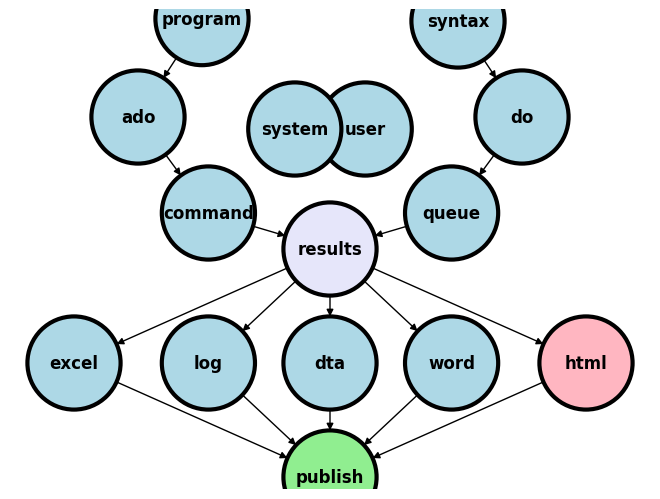

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_node("user", pos=(550, 500))
G.add_node("system", pos=(-550, 500))
G.add_node("program", pos=(-2000, 960))
G.add_node("syntax", pos=(2000, 950))
G.add_node("ado", pos=(-3000, 550))
G.add_node("do", pos=(3000, 550))
G.add_node("command", pos=(-1900, 150))
G.add_node("queue", pos=(1900, 150))
G.add_node("results", pos=(0, 0))
G.add_node("dta", pos=(0, -475))
G.add_node("log", pos=(-1900, -475))
G.add_node("excel", pos=(-4000, -475))
G.add_node("word", pos=(1900, -475))
G.add_node("html", pos=(4000, -475))
G.add_node("publish", pos=(0, -950))
G.add_edges_from([("program", "ado"), ("syntax", "do")])
G.add_edges_from([("ado", "command"), ("do", "queue")])
G.add_edges_from([("command", "results"), ("queue", "results"), ("results", "excel"), ("results", "word"), ("results", "html")])
G.add_edges_from([("results", "dta"), ("results", "log")])
G.add_edges_from([("dta", "publish"), ("log", "publish"), ("excel", "publish"), ("word", "publish"), ("html", "publish")])

pos = nx.get_node_attributes(G, 'pos')
node_colors = ["lightblue" if node not in ["results", "html", "publish"] else "lightpink" if node == "html" else "lavender" if node == "results" else "lightgreen" for node in G.nodes()]

nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=4500, node_color=node_colors, linewidths=3)
ax = plt.gca()
ax.collections[0].set_edgecolor("#000000")  # Set edge color to black for better contrast
ax.set_xlim([-5000, 5000])
ax.set_ylim([-1000, 1000])
plt.show()



### 4.1 Datafiles

The National Health Center for Statistics (NCHS) at the Centers for Disease Control (CDC) maintains an [exemplary](https://wwwn.cdc.gov/nchs/nhanes/ContinuousNhanes/Default.aspx?BeginYear=1999) [file management system](https://ftp.cdc.gov/pub/). This system enables both U.S. and international researchers to access high-quality clinical and public health data crucial for their analyses.

If you're aiming to embody the principles of `open science`, the NCHS represents a model starting point. 

While the primary aim of this intermediate class is not to instruct you in website design, it is designed to equip you with the skills necessary to self-publish. This capability extends to various contexts—whether for individual researchers, labs, research groups, collaborators, or private enterprises.

You will learn the basics of Markdown, LaTeX, and HTML, providing a robust foundation for your publishing endeavors. The purpose of your labs and homework assignments is to demonstrate how these skills facilitate scientific progress.

[Open science](https://jhufena.github.io/home/act4/act_4_0/act_4_0_1.html#), however, introduces concerns regarding the privacy and confidentiality of human subjects data. In this class, we utilize simulated data to sidestep these concerns, while the advanced class will cover formalizing security processes using "Git Security" to protect research data.

Understanding the sensitivity of medical and public health research data, you should employ stringent Git security measures, which are a specific application of Public Key Infrastructure:
- **Repositories:** Maintaining separate Private and Public repositories ensures appropriate data segregation. Public repositories foster open science, whereas private repositories protect sensitive or preliminary data.
- **Authentication:** SSH key authentication secures every user interaction with the platform, ensuring all data changes and accesses are authorized and traceable.
- **Encryption:** Using Public and Private key infrastructure, data transfers to and from GitHub are encrypted, safeguarding data integrity and confidentiality.

![](html.png)

**Challenge**:
- Navigate to `Quick Refs > Datasets`
- Right click on `transplants.txt`
- Download linked file
- Upload it to your HW4 repo
- `Click > Raw > URL`
- You'll now type this in your `README.md` file
   - `[dataset](transplants.txt)`
   - Commit changes
   - View `README.md`
   - What do you see?




### 4.2 Codebooks: Essential for Data Mastery

Even if you're an intermediate Stata user, never underestimate the power of a well-organized codebook, especially when diving into unfamiliar datasets. Commands like `describe`, `codebook`, `ds`, `which`, and `lookfor` are invaluable tools that provide deep insights into your data’s structure and contents. They empower users to navigate datasets efficiently, making these commands a staple in your analytical arsenal.

However, for many users, particularly those new to a dataset, the codebook is not just useful—it’s indispensable. Take the NHANES dataset, for example. If you're new to it, start by exploring its rich documentation and codebook available [here](https://wwwn.cdc.gov/Nchs/Nhanes/1999-2000/DEMO.htm). This initial step can drastically flatten your learning curve.

For those looking to communicate or share data insights effectively, Markdown offers a straightforward way to create neat, readable tables. Suppose you want to represent frequency tables as seen in NHANES documentation. Here’s how you can do it on GitHub:

1. Navigate to one of your GitHub repositories.
2. Create a new `.md` file.
3. Use the Markdown table syntax to neatly display your data.

Here’s a sample Markdown table showcasing NCHS documentation:

 
| Code or Value     | Value Description                 | Count | Cumulative | Skip to Item |
|-------------------|-----------------------------------|-------|------------|--------------|
| 1                 | NHANES 1999-2000 Public Release   | 9665  |            |              |
| .                 | Missing                           | 0     | 9965       |              |
 

Remember, mastering the use of codebooks and Markdown will not only enhance your data management skills but also improve collaboration with your peers.

**Challege**: can you reproduce this table in your README.md file on the `hw4` repo you create for next weeks assignment?

Here's the markdown syntax:

```markdown
| Code or Value     | Value Description                 | Count | Cumulative | Skip to Item |
|-------------------|-----------------------------------|-------|------------|--------------|
| 1                 | NHANES 1999-2000 Public Release   | 9665  |            |              |
| .                 | Missing                           | 0     | 9965       |              |
```

### 4.3 Leveraging `dyndoc` for Enhanced Collaboration and Documentation

The `dyndoc` command in Stata transforms how we manage and integrate documentation directly within the `.do` file environment. This powerful tool not only allows for seamless integration of code and output but also supports the inclusion of comprehensive documents, ranging from abstracts to full manuscripts. By embedding documentation alongside your Stata code, `dyndoc` ensures that every piece of analysis is immediately accompanied by relevant insights and explanations, enhancing both readability and usability.

For teams, especially those welcoming new members, the ability to access a well-documented, centralized repository of project files is invaluable. A robust, richly annotated `.do` file serves as an excellent onboarding tool, rapidly bringing newcomers up to speed by providing them with context, background, and operational details of the project. It allows them to understand not just the "how" but also the "why" behind each analysis.

Moreover, by granting editing privileges to existing collaborators, you can foster an environment of continuous improvement and collective ownership. Team members can refine, expand, or update `.do` and `.ado` files, thereby contributing to the evolution of your analytical scripts and methodologies.

Managing versions of your files—be they `.do`, `.ado`, `.docx`, or `.xlsx`—is streamlined with the use of platforms like GitHub. Here, each update can be accompanied by a "commit statement," which not only saves the version history but also provides a narrative for why changes were made. This practice, foundational to GitHub, enhances transparency and traceability within your projects.

By leveraging `dyndoc` and effective version control, you can ensure that your analytical projects are not only well-documented and accessible but also continually refined and up-to-date, reflecting the collective expertise and ongoing contributions of your team.

**Challange**
- Navigate you GitHub repo to settings: the last item among the headers
- `Settings > Collaborators > Add People > Search by username, full name, or email`
- You'll collaborate with your classmates on HW5
- Collaborators can be given varying degrees of privileges 


### 4.4 Advancing Towards Self-Publication

Initiating the journey of self-publication isn't just a milestone—it's a skill-building adventure that began with your most recent homework (HW3) and will continuously evolve with each subsequent assignment. Do not think of this progression as merely about fulfilling course requirements; it's about mastering the art of communicating your findings, shaping your thoughts into publishable content, and understanding the power of accessability and aesthetics.

As you move from one homework to the next, your abilities in drafting, editing, and presenting scholarly work will develop. Each piece of homework acts as a stepping stone, enhancing your capability to construct coherent arguments, support them with robust data, and format your work according to professional standards.

This ongoing practice prepares you not just to meet academic expectations but to exceed them, paving the way for future self-publications. By the time you complete this course, you’ll be equipped not only with comprehensive subject knowledge but also with the confidence to share your insights with the wider academic community.

Moreover, the iterative process of updating your skills through continuous assignments teaches you about the dynamic nature of research and publication. You learn to adapt to feedback, apply critical changes, and improve the clarity and impact of your research. This is essential for anyone aiming to make a mark in the field of academia or any professional domain where conveying complex information effectively is crucial.

**Challenge**
- Create a repo for `HW5`
- Using a copy of your `index.do` file from `HW1`, create `index.html` using `dyndoc`
- Let's recreate yet another "Hello, world!" website
- Thats `iteration 1`
- Now let's iterate give times:
   - Second iteration change the content to `# Title` & make a meaningful Commit statement (e.g. Title added)
   - Third iteration add on the next line `## Sub-title` and make a Commit statement
   - Fourth iteration add `### Sub-sub-title` to the third line

We now have a "version history":
   - Click on `index.html`
   - Look for "History" in the top right corner
   - We'll learn how to "time-travel" to previous versions
   - And we'll also learn how to restore previous versions, if the currenet one has been "corrupted" 



### 4.5 Mastering Version Control

Version control is essential for efficiently and transparently managing changes in your projects. With your third homework assignment (HW3) due this Thursday, many of you have already transitioned from a simple `.do` file—starting with the traditional [Hello, world!](https://en.wikipedia.org/wiki/%22Hello,_World!%22_program) greeting—to a more complex script. This evolution is not just about altering text; it's about understanding how to track and manage incremental changes over time.

Begin by "enriching" your `.do` file's output. Update the initial "Hello, world!!" greeting to include two quotes, thereby engaging in a process of **iteration**. There’s no need to reshare your URLs in the GitHub Discussion forum; the link remains the same, but the content can be updated indefinitely. This avoids overwhelming your collaborators with constant emails and attachments bearing names like `index_version2.do, index_version3.do, index_version_AM.do, index_version_May17.do`, a major advantage of hosting your projects online.

In your commit statement, which logs this change, opt for something concise yet descriptive, such as "Added an extra exclamation." Such commit messages are vital as they provide a clear, succinct record of what was changed, making it easier for anyone reviewing the file's history to grasp the nature of each update.

After making the update, review the "git" log in your repository’s history. This log is a crucial aspect of version control, providing a chronological timeline of all changes made to the file. By examining this history, you can see who made changes, when they were made, and what specific adjustments were implemented at each step. This transparency is invaluable in collaborative environments, ensuring that all team members are informed of developments and can trace each modification back to its origin.

Engaging with version control not only aids in maintaining a clean and orderly codebase but also instills a discipline of meticulous record-keeping and communication, which is beneficial across both academic and professional settings.

**Challenge**
- From our previous example you'll notice that you didn't change the file name each time you updated
- Yet you preserved your entire version history in a very tidy, powerful, collaborative way
- We can also create copies of entire repositories to serve other purposes that might be beyond this course

### 4.6 Lab 

For this lab, you'll be emulating the process you used in HW3 by creating another `index.do` file. Utilize the `dyndoc` command in Stata to convert this `.do` file into an `index.html`. Then, upload this HTML file to a specific repository structure on GitHub at `github > username > hw4`. This task not only reinforces your skills in document generation with Stata but also in managing content within version control systems.

Why do we use the name "index" for these files? The term "index" in file naming is traditionally used for the default or home page of a directory in web development. When you name a file `index.html`, web servers and hosting services like GitHub Pages automatically recognize it as the starting point of your website. This means that when someone navigates to your repository's URL, `index.html` is the first file that gets displayed. This convention simplifies the URL, as you don’t need to specify the filename to access the main page. It streamlines access and navigation, making `index.html` an organizational standard for web projects.

By applying this naming convention in your coursework, you learn how to structure web content effectively, preparing you for real-world scenarios where web documents need to be immediately accessible and properly organized within a server or hosting platform. This practice not only aids in your understanding of web architecture but also ensures that your projects are presented in a professional, accessible manner.

Experiment with snippets from [here](https://jhustata.github.io/intermediate/chapter2.html#how-to-embed-stata-results-in-html):

#### dyndoc
- `<<dd_do:nooutput>>`
- `<</dd_do>>`
- `<<dd_display: c(N)>>`, and other macros beyond `c(N)`


#### markdown

Title    
Authors  
**Background**: Playing around with *Markdown* 
**Methods**: Using `.do` file as text editor, converting to `.html` with `dyndoc`   
**Results**: By uploading `index.html` to my `hw4` repo, I'll have yet again something to share with the world  
**Concusions**: I'll be back!  

To insert an image in your output in a mardown environment, use the syntax: `![](filename.png)`. First try this in the README.md file of your `hw4` repo. But for your `.do` file, with `dyndoc`, the sytax is `<<dd_graph>>`

#### LaTeX

Navigate to your `HW4 Instructions > 4. Website Design > Incorporating Greek Symbols`:
- Right-click on the "Greeks"
- Show Math As...
- `TeX` Commands
- Copy to Clipboard
- Paste into your repos README.md file
- Apply a `$` sign at the beginning and end of this `LaTeX` snippet
- Preview your README to ensure it works
- Now rety with two `$$` signs before and after to note the difference
- You can commit changes if you are satisfied with the look

#### HTML

Now <u>underline</u> this text. The syntax for that is:

```html
Now <u>underline</u> this text
```

Remember, there are a lot of online resources on markdown, LaTeX, and HTML. We already picked [this one](https://jhustata.github.io/intermediate/chapter3.html#lab) for you for starters.


### 4.7 Homework Instructions

1. **Data Simulation**:
    - Initialize your dataset with 30 observations using the command: `set obs 30`.

2. **Variable Generation**:
    - Create an `age` variable with a mean of 57 years and a standard deviation of 15. Use the command (to simulate a normal distribution): `gen age = (rnormal() * 15) + 57`.
    - **Note**: Alternatively, use `gen age_t=(rt(_N)*15)+57` to simulate a t-distribution. Type: `help rt` into the command window to read more. Or use other resources to appreciate why `_N (degrees of freedom)` might affect a t-distribution. It's beyond the scope of this class to decide which of these is appropriate.

3. **Graphical Representation**:
    - Plot a histogram of the `age` variables from both `rnormal() and rt()`, and overlay it with a theoretical normal distribution curve. The command to achieve this is: `hist age, normal`.
    - This visualization will help in understanding the distribution of `age` among the observations.

```stata
hist age, ///
   fcolor(orange%40) /// simulated normal 
   addplot(hist age_t, fcolor(midblue%50)) /// simulated t-distribution 
   normal /// theoretical normal
   legend(on ///
      lab(1 "Sampled from Normal") ///
	  lab(2 "Theoretical Normal") ///
	  lab(3 "Sampled from t-distribution") ///
	  )


```

4. **Website Design**:
    - Develop a simple website to showcase the graph. Ensure to refer to the guide [here](https://jhustata.github.io/intermediate/chapter2.html#case-study) for a comprehensive approach.
    - In your footnotes, clarify that the results are based on simulated data.
    - Incorporate Greek symbols in your explanations, akin to: "Distribution of $\text{Age, years} \sim \mathcal{N}(\mu=57,\,\sigma^{2}=225)$", to provide a mathematical representation of the age distribution.

5. **Documentation and Sharing**:
    - Utilize the `dyndoc` command in Stata to convert a document (`.md`, `.txt`, or `.do` file) into `.html` format. 
    - Upload the resulting `.html` file along with any associated output to GitHub. Make sure to set up a GitHub Pages site to display your work, as shown in [this guide](https://jhustata.github.io/intermediate/chapter2.html#case-study).

6. **Submission**:
    - Submit to CoursePlus DropBox your `.do` file which was used to generate the `.html` document. Also, copy & paste the URL into the relevant topic within the Stata II (Intermediate) HW3 discussion on [GitHub Discussions](https://github.com/jhufena/discussions/discussions).
    

